In [1]:
%matplotlib inline
import warnings; warnings.filterwarnings(action='ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import smog_code.kpp4py as kpp

In [2]:
from read_results import read_varnames
varnames = read_varnames("smog_code/smog_Parameters.f90")[0:12]
print(len(varnames), varnames)

12 ['HNO3', 'O', 'RH', 'RCOO2NO2', 'O3', 'HO2', 'RCOO2', 'RCHO', 'RO2', 'NO', 'NO2', 'OH']


In [3]:
df_range = pd.read_csv('smog_range.csv', index_col=0)
df_range['mid'] = 0.5*(df_range['min']+df_range['max'])

In [4]:
f0 = kpp.onestep(df_range['mid'].T).T

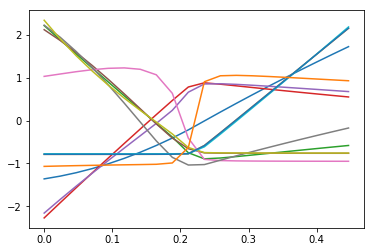

In [5]:
n = 10

y0_list = np.empty([20, 12])
y0_list[:] = df_range['mid'].values

y0_list[:,n] = np.linspace(df_range['min'][n],df_range['max'][n], 20)

f1 = kpp.onestep(y0_list.T).T
plt.plot(y0_list[:,n], StandardScaler().fit_transform(f1));